# Lab 02 - Titanic

The RMS Titanic is an infamous passenger ship which was built in 1912 and sank on its maiden voyage. A number of passengers survived its sinking; however, the probability of survival depended on the fare paid by the passenger.

In this lab, your task is to show the relationship between the fare paid and survival from the ship’s sinking. This lab tests your ability to import and manipulate data and to display it using a graphing tool.

### Data
Kaggle (​https://www.kaggle.com/c/titanic/data​)

Assume data is in the ```./titanic.csv```

### Tips
- Read the data, which you may assume is in the same directory as the notebook / script.
- Show that you have inspected the data to determine fields.
- Show the difference in survival rates based on fare paid using a graph.

### Notes
To install unfounded module
```
pip3 install <module_name> --user
``` 



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv('titanic.csv')
# df.head(5)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
survived_df = df[df['Survived'] == 1]
not_survived_df = df[df['Survived'] == 0]

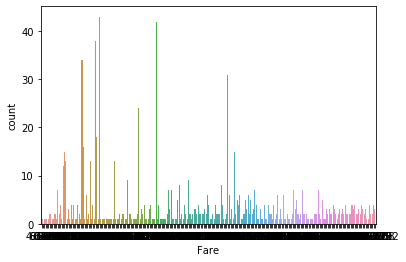

In [27]:
sns.countplot(x = survived_df['Fare'], data = survived_df)

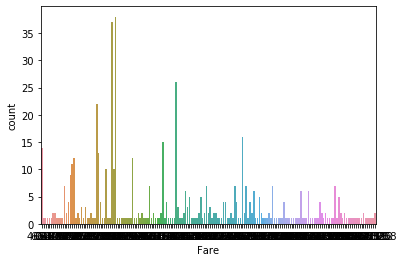

In [30]:
sns.countplot(x = not_survived_df['Fare'], data = not_survived_df)

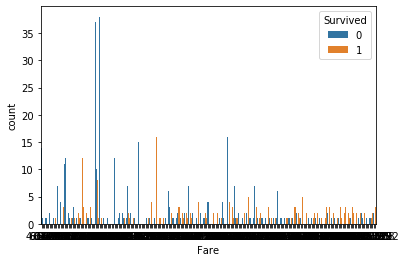

In [31]:
sns.countplot(x = df['Fare'], hue = df['Survived'], data = df)

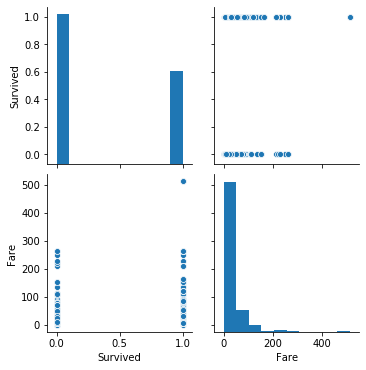

In [24]:
sur_fare_df = df[['Survived','Fare']]
sns.pairplot(sur_fare_df, kind="scatter")
plt.show()

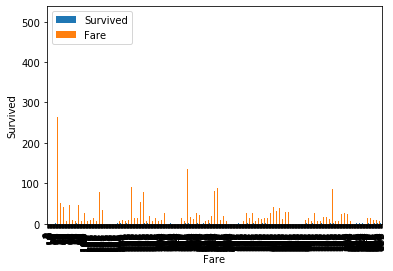

In [19]:
sur_fare_df.plot.bar()
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.show()

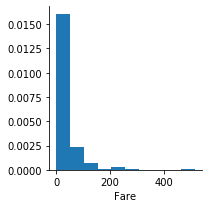

In [45]:
sns.FacetGrid(df).map(plt.hist, 'Fare', bins = 10, normed = True)

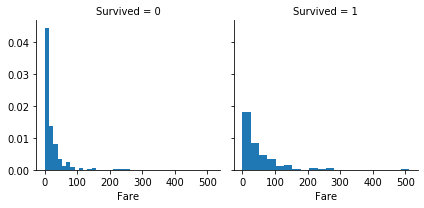

In [52]:
sns.FacetGrid(df, col = 'Survived').map(plt.hist, 'Fare', bins = 20, normed = True)